In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm
import os, sys
os.chdir(r'E:\Sem6\PRML\PA_2\PA2_Datasets\PA2_Datasets\Dataset_2')

In [8]:
df=pd.read_csv('Dataset_2_Team_1.csv')
X=np.array(df.iloc[:,:2])
y=np.array(df.iloc[:,2])

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

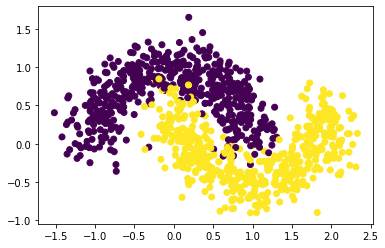

In [10]:
plt.scatter(X[:,0],X[:,1],c=y)

In [11]:
c = np.arange(0.1,2.1,0.1)
acc_train = []
acc_test = []
for i in c:
    clf = svm.SVC(C=i,kernel='poly',degree=3,gamma='auto')
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    acc_train.append(clf.score(X_train,y_train))
    acc_test.append(clf.score(X_test,y_test))
acc_train=np.array(acc_train)
acc_test = np.array(acc_test)

Text(0.5, 1.0, 'Accuracy of the test data vs C')

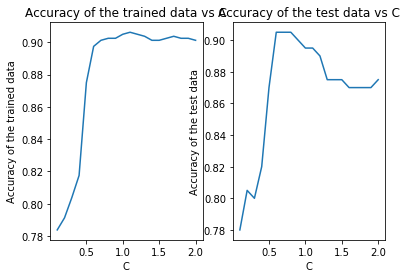

In [12]:
plt.subplot(121)
plt.plot(c,acc_train)
plt.xlabel('C')
plt.ylabel('Accuracy of the trained data')
plt.title('Accuracy of the trained data vs C')
plt.subplot(122)
plt.plot(c,acc_test)
plt.xlabel('C')
plt.ylabel('Accuracy of the test data')
plt.title('Accuracy of the test data vs C')

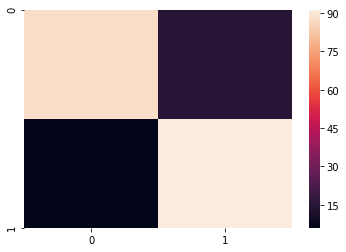

In [13]:
#Taking c= 1.0
clf = svm.SVC(C=1,kernel='poly',degree=3,gamma='auto')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
cf=confusion_matrix(y_test,y_pred)
sn.heatmap(cf)

In [14]:
h=.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

NameError: name 'sv' is not defined

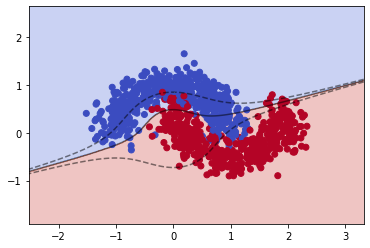

In [15]:
z = clf.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
Z = clf.decision_function(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
plt.contourf(xx,yy,z,cmap=plt.cm.coolwarm,alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
plt.scatter(sv[:, 0], sv[:, 1],linewidth=1, facecolors='None', edgecolors='k')

In [ ]:
decision_function=clf.decision_function(X)
a=1e-2
(low_lim,up_lim)=(1-a,1+a)
l=(2*y-1)*decision_function
support_vector_indices=np.where(np.logical_and(l>=low_lim, l<=up_lim))
support_vectors = X[support_vector_indices]

In [ ]:
support_vectors.shape[0]